In [1]:
import random
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

In [23]:
with open('current_city_list.json', encoding="utf8") as json_data:
    city_ids = json.load(json_data)
    json_data.close()
city_ids

[{'coord': {'lat': 34.790878, 'lon': 48.570728},
  'country': 'IR',
  'geoname': {'cl': 'P', 'code': 'PPL', 'parent': 132142},
  'id': 14256,
  'langs': [{'de': 'Azad Shahr'}, {'fa': 'آزادشهر'}],
  'name': 'Azadshahr',
  'stat': {'level': 1.0, 'population': 514102},
  'stations': [{'dist': 9, 'id': 7030, 'kf': 1}],
  'zoom': 10},
 {'coord': {'lat': 35.012501, 'lon': 34.058331},
  'country': 'CY',
  'geoname': {'cl': 'P', 'code': 'PPL', 'parent': 146615},
  'id': 18918,
  'langs': [{'en': 'Protaras'}, {'ru': 'Протарас'}],
  'name': 'Protaras',
  'stat': {'level': 1.0, 'population': 20230},
  'stations': [{'dist': 42, 'id': 5448, 'kf': 1}],
  'zoom': 6},
 {'coord': {'lat': 34.383801, 'lon': 47.055302},
  'country': 'IR',
  'geoname': {'cl': 'P', 'code': 'PPL', 'parent': 128222},
  'id': 23814,
  'langs': [{'fa': 'کهریز'}],
  'name': 'Kahriz',
  'stat': {'level': 1.0, 'population': 766706},
  'stations': [{'dist': 10, 'id': 7022, 'kf': 1}],
  'zoom': 7},
 {'coord': {'lat': 34.073399, 'lon

In [51]:
len(city_ids['coord']['lon'])
    #city_ids['long'][x] = city_ids[x]['coord']['lon']
#for x in range(0,len(city_ids)):
    #print(city_ids[x]['coord']['lat'])
    #city
#city_ids['long'] = city_ids['coord']['lon']


TypeError: list indices must be integers or slices, not str

In [3]:
#get a random list of cities from id table
cities_list = [None] * 500
cities_list = pd.DataFrame(cities_list)
cities_list['id'] = [None] * 500
cities_list['lat'] = [None] * 500
cities_list['long'] = [None] * 500
cities_list = cities_list.rename(columns={0:'name'})

for x in range(0,500):
    val = random.randint(0,len(city_ids)-1)
    cities_list['lat'][x] = city_ids[val]['coord']['lat']
    cities_list['long'][x] = city_ids[val]['coord']['lon']
    cities_list['name'][x] = city_ids[val]['name']
    cities_list['id'][x] = city_ids[val]['id']
cities_list.head(1)

,name,id,lat,long
0,Shush,114593,32.1942,48.2436


In [4]:
cities_list['lat'] = pd.to_numeric(cities_list['lat'],errors='coerce')

In [5]:
cities_list['long'] = pd.to_numeric(cities_list['long'],errors='coerce')

In [6]:
list = pd.DataFrame(cities_list).sort_values(by=['lat'])
min(list['lat'])

-38.002281

In [7]:
max(list['lat'])

61.314331

In [8]:
min(list['long'])

-171.766663

In [9]:
max(list['long'])

155.536743

In [10]:
bulk_url = 'http://api.openweathermap.org/data/2.5/group?units=imperial&id='

In [11]:
full_url = [None]*500
for x in range(0,500):
    full_url[x] = bulk_url+str(cities_list['id'][x])+'&APPID=bb49e8d2dcb7b133cc968c136c2aebeb'
full_url[0]

'http://api.openweathermap.org/data/2.5/group?units=imperial&id=114593&APPID=bb49e8d2dcb7b133cc968c136c2aebeb'

In [12]:
weather_data=[None] * 500
for x in range(0,500):
    weatherdata = full_url[x]
    weather_data[x] = requests.get(weatherdata).json()
    print(cities_list['id'][x], cities_list['name'][x],full_url[x])

import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

114593 Shush http://api.openweathermap.org/data/2.5/group?units=imperial&id=114593&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5342992 Diamond Bar http://api.openweathermap.org/data/2.5/group?units=imperial&id=5342992&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
315639 Emet http://api.openweathermap.org/data/2.5/group?units=imperial&id=315639&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2176934 Banora Point http://api.openweathermap.org/data/2.5/group?units=imperial&id=2176934&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1643761 Grogol http://api.openweathermap.org/data/2.5/group?units=imperial&id=1643761&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1230613 Peliyagoda http://api.openweathermap.org/data/2.5/group?units=imperial&id=1230613&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1566346 Thai Binh http://api.openweathermap.org/data/2.5/group?units=imperial&id=1566346&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1650357 Bandung http://api.openweathermap.org/data/2.5/group?units=imperial&id=1650357&APPID=bb49e8d2dcb7b133cc968

3272941 Riedstadt http://api.openweathermap.org/data/2.5/group?units=imperial&id=3272941&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
4180439 Atlanta http://api.openweathermap.org/data/2.5/group?units=imperial&id=4180439&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1182998 Bela http://api.openweathermap.org/data/2.5/group?units=imperial&id=1182998&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2754669 Heerenveen http://api.openweathermap.org/data/2.5/group?units=imperial&id=2754669&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2110959 Sukagawa http://api.openweathermap.org/data/2.5/group?units=imperial&id=2110959&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3430598 Monte Caseros http://api.openweathermap.org/data/2.5/group?units=imperial&id=3430598&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
4295251 Hopkinsville http://api.openweathermap.org/data/2.5/group?units=imperial&id=4295251&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1169620 Mustafabad http://api.openweathermap.org/data/2.5/group?units=imperial&id=1169620&APPID=bb49e8d2

2348783 Awgu http://api.openweathermap.org/data/2.5/group?units=imperial&id=2348783&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3165072 Udine http://api.openweathermap.org/data/2.5/group?units=imperial&id=3165072&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1791249 Wuhai http://api.openweathermap.org/data/2.5/group?units=imperial&id=1791249&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1848447 Yatsuo http://api.openweathermap.org/data/2.5/group?units=imperial&id=1848447&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
147425 Neftcala http://api.openweathermap.org/data/2.5/group?units=imperial&id=147425&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1804609 Laibin http://api.openweathermap.org/data/2.5/group?units=imperial&id=1804609&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3174953 Lecce http://api.openweathermap.org/data/2.5/group?units=imperial&id=3174953&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3859512 Dean Funes http://api.openweathermap.org/data/2.5/group?units=imperial&id=3859512&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1

1805270 Jishou http://api.openweathermap.org/data/2.5/group?units=imperial&id=1805270&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
4984565 Auburn Hills http://api.openweathermap.org/data/2.5/group?units=imperial&id=4984565&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
6534228 Guidonia Montecelio http://api.openweathermap.org/data/2.5/group?units=imperial&id=6534228&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5147968 Bowling Green http://api.openweathermap.org/data/2.5/group?units=imperial&id=5147968&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5325423 Azusa http://api.openweathermap.org/data/2.5/group?units=imperial&id=5325423&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3044310 Szombathely http://api.openweathermap.org/data/2.5/group?units=imperial&id=3044310&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5781993 Springville http://api.openweathermap.org/data/2.5/group?units=imperial&id=5781993&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2976043 Sarcelles http://api.openweathermap.org/data/2.5/group?units=imperial&id=2976043&A

4679803 Cedar Hill http://api.openweathermap.org/data/2.5/group?units=imperial&id=4679803&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3166034 Sulmona http://api.openweathermap.org/data/2.5/group?units=imperial&id=3166034&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1257022 Satna http://api.openweathermap.org/data/2.5/group?units=imperial&id=1257022&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2429344 Kyabe http://api.openweathermap.org/data/2.5/group?units=imperial&id=2429344&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2970777 Vannes http://api.openweathermap.org/data/2.5/group?units=imperial&id=2970777&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1838716 Bucheon http://api.openweathermap.org/data/2.5/group?units=imperial&id=1838716&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3437444 Presidente Franco http://api.openweathermap.org/data/2.5/group?units=imperial&id=3437444&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3430863 Mar del Plata http://api.openweathermap.org/data/2.5/group?units=imperial&id=3430863&APPID=bb49e8d2dcb

6941080 Fort Bragg http://api.openweathermap.org/data/2.5/group?units=imperial&id=6941080&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3467012 Carangola http://api.openweathermap.org/data/2.5/group?units=imperial&id=3467012&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2756723 Dongen http://api.openweathermap.org/data/2.5/group?units=imperial&id=2756723&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1258362 Ratanpur http://api.openweathermap.org/data/2.5/group?units=imperial&id=1258362&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3063548 Usti nad Labem http://api.openweathermap.org/data/2.5/group?units=imperial&id=3063548&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
548410 Kirov http://api.openweathermap.org/data/2.5/group?units=imperial&id=548410&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
463824 Zelenokumsk http://api.openweathermap.org/data/2.5/group?units=imperial&id=463824&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
4752229 Chester http://api.openweathermap.org/data/2.5/group?units=imperial&id=4752229&APPID=bb49e8d2dcb7b13

2026303 Bolshoy Kamen http://api.openweathermap.org/data/2.5/group?units=imperial&id=2026303&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
922806 Kipushi http://api.openweathermap.org/data/2.5/group?units=imperial&id=922806&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5143630 West Babylon http://api.openweathermap.org/data/2.5/group?units=imperial&id=5143630&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2333451 Kumo http://api.openweathermap.org/data/2.5/group?units=imperial&id=2333451&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1289828 Wakema http://api.openweathermap.org/data/2.5/group?units=imperial&id=1289828&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3035843 Auxerre http://api.openweathermap.org/data/2.5/group?units=imperial&id=3035843&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1797038 Runan http://api.openweathermap.org/data/2.5/group?units=imperial&id=1797038&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
5364916 Lamont http://api.openweathermap.org/data/2.5/group?units=imperial&id=5364916&APPID=bb49e8d2dcb7b133cc968c1

2940213 Celle http://api.openweathermap.org/data/2.5/group?units=imperial&id=2940213&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2661861 Adliswil http://api.openweathermap.org/data/2.5/group?units=imperial&id=2661861&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2952984 Bamberg http://api.openweathermap.org/data/2.5/group?units=imperial&id=2952984&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3598128 Ciudad Vieja http://api.openweathermap.org/data/2.5/group?units=imperial&id=3598128&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
934131 Quatre Bornes http://api.openweathermap.org/data/2.5/group?units=imperial&id=934131&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
3530597 Mexico City http://api.openweathermap.org/data/2.5/group?units=imperial&id=3530597&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
1266774 Kheralu http://api.openweathermap.org/data/2.5/group?units=imperial&id=1266774&APPID=bb49e8d2dcb7b133cc968c136c2aebeb
2435508 Benoy http://api.openweathermap.org/data/2.5/group?units=imperial&id=2435508&APPID=bb49e8d2dcb7b13

In [13]:
cities_list['clouds'] = [None] * 500
cities_list['temp'] = [None] * 500
cities_list['humidity'] = [None] * 500
cities_list['wind'] = [None] * 500

for x in range(0,500):
    cities_list['clouds'][x] = weather_data[x]['list'][0]['clouds']['all']
    cities_list['temp'][x] = weather_data[x]['list'][0]['main']['temp'];
    cities_list['humidity'][x] = weather_data[x]['list'][0]['main']['humidity'];
    cities_list['wind'][x] = weather_data[x]['list'][0]['wind']['speed']

C:\Users\Computer\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Computer\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Computer\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Computer\Anaconda3\envs\PythonData\lib\site

In [14]:
cities_list.head()

,name,id,lat,long,clouds,temp,humidity,wind
0,Shush,114593,32.194199,48.243599,0,56.31,93,2.86
1,Diamond Bar,5342992,34.028622,-117.810341,75,63.59,48,13.87
2,Emet,315639,39.342999,29.258471,56,49.02,89,2.42
3,Banora Point,2176934,-28.212980,153.536346,0,57.2,93,10.92
4,Grogol,1643761,-7.601110,110.818611,20,67.83,100,0.96


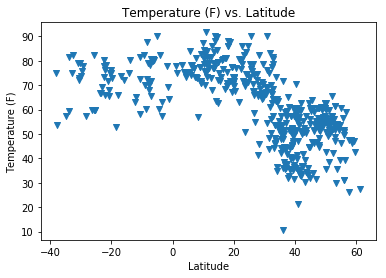

In [15]:
#print scatter plot of temperature vs. latitude for all cities
plt.scatter(cities_list['lat'], cities_list['temp'], marker='v', label="Temperature")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.show()

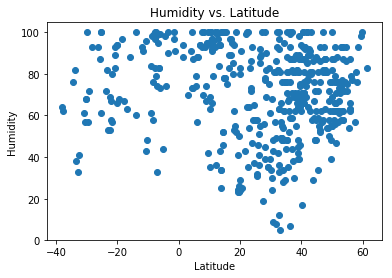

In [16]:
#print scatter plot of humidity vs. latitude for all cities
plt.scatter(cities_list['lat'], cities_list['humidity'], marker='o', label="Humidity")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')
plt.show()

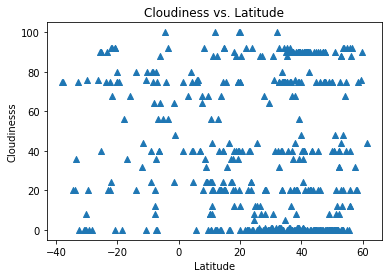

In [17]:
#print scatter plot of cloudiness vs. latitude for all cities

plt.scatter(cities_list['lat'], cities_list['clouds'], marker='^', label="Cloudiness")

plt.xlabel('Latitude')
plt.ylabel('Cloudinesss')
plt.title('Cloudiness vs. Latitude')
plt.show()

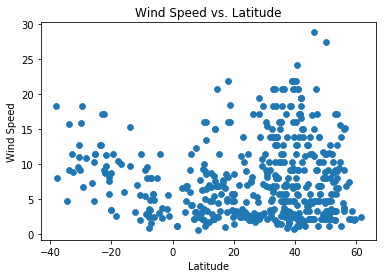

In [18]:
#print scatter plot of wind speed vs. latitude for all cities

plt.scatter(cities_list['lat'], cities_list['wind'], marker='8', label="Wind Speed")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude')
plt.show()